In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("/content/Churn_Modelling.csv")
drop_cols = ["RowNumber","CustomerId","Surname"]
for col in drop_cols:
  df.drop(col,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [13]:
#### Visualization
male_left = df[df["Gender"] == "Male"][df["Exited"] == 1]["Exited"].value_counts()
male_remain = df[df["Gender"] == "Male"][df["Exited"] == 0]["Exited"].value_counts()

female_left = df[df["Gender"] == "Female"][df["Exited"] == 1]["Exited"].value_counts()
female_remain = df[df["Gender"] == "Female"][df["Exited"] == 0]["Exited"].value_counts()

<ipython-input-13-9464381f449c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_left = df[df["Gender"] == "Male"][df["Exited"] == 1]["Exited"].value_counts()
<ipython-input-13-9464381f449c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_remain = df[df["Gender"] == "Male"][df["Exited"] == 0]["Exited"].value_counts()
<ipython-input-13-9464381f449c>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_left = df[df["Gender"] == "Female"][df["Exited"] == 1]["Exited"].value_counts()
<ipython-input-13-9464381f449c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_remain = df[df["Gender"] == "Female"][df["Exited"] == 0]["Exited"].value_counts()


In [14]:
(male_left,male_remain)

(Exited
 1    898
 Name: count, dtype: int64,
 Exited
 0    4559
 Name: count, dtype: int64)

In [15]:
(female_left,female_remain)

(Exited
 1    1139
 Name: count, dtype: int64,
 Exited
 0    3404
 Name: count, dtype: int64)

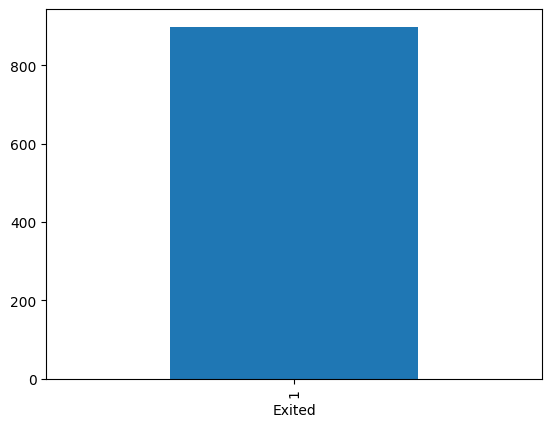

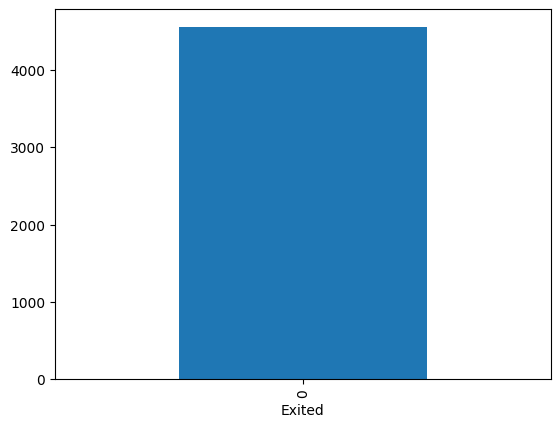

In [30]:
male_left.plot(kind="bar")
plt.show()
male_remain.plot(kind="bar")
plt.show()

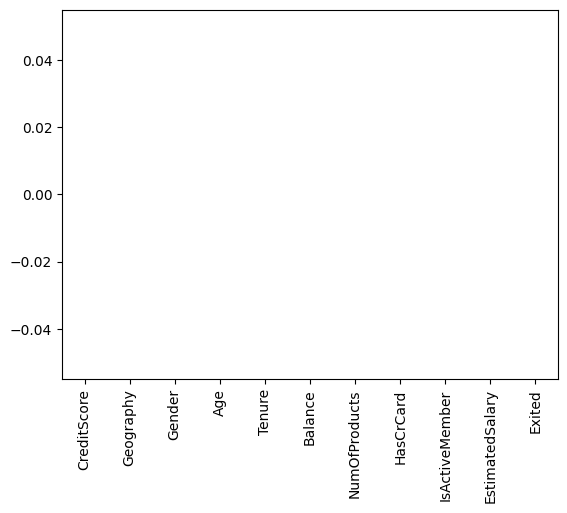

In [26]:
missing_value = (df.isnull().sum()/len(df)*100)

missing_value.plot(kind="bar")
plt.show()

In [31]:
## Scaling values
num_cols = ["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember"]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])



In [32]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2634,0.622,Spain,Female,0.324324,0.9,0.300367,0.000000,1.0,0.0,27608.12,1
7606,0.660,Germany,Female,0.175676,0.3,0.507503,0.666667,1.0,1.0,176433.60,0
4601,0.584,Germany,Male,0.162162,0.8,0.536063,0.000000,0.0,0.0,43250.54,0
9650,0.968,Spain,Male,0.202703,0.5,0.000000,0.333333,1.0,0.0,66285.18,0
116,0.636,Germany,Female,0.256757,0.6,0.669054,0.000000,1.0,0.0,115638.29,0


In [34]:
df.replace(["Male","Female"],[1,0],inplace=True)

<ipython-input-34-16dbe5adf835>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["Male","Female"],[1,0],inplace=True)


In [ ]:
df = pd.get_dummies(df,columns=["Geography"])


In [39]:
df.replace([True,False],[1,0],inplace=True)

<ipython-input-39-43205b1a468e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([True,False],[1,0],inplace=True)


In [40]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1.0,1.0,101348.88,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0.0,1.0,112542.58,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1.0,0.0,113931.57,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0.0,0.0,93826.63,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1.0,1.0,79084.10,0,0,0,1


In [42]:
X = df.drop("Exited",axis=1)
y = df["Exited"]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

Without Handle Imbalancement

In [45]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [47]:
y_train.value_counts() ,y_test.value_counts()

(Exited
 0    6370
 1    1630
 Name: count, dtype: int64,
 Exited
 0    1593
 1     407
 Name: count, dtype: int64)

In [48]:
def model(X_train,y_train,X_test,y_test):
  model = LogisticRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  print(classification_report(y_test,y_pred))

  return y_pred

In [49]:
y_pred = model(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1593
           1       0.49      0.12      0.20       407

    accuracy                           0.80      2000
   macro avg       0.65      0.55      0.54      2000
weighted avg       0.75      0.80      0.74      2000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. UnderSampling of Majority Class

In [52]:
count0 , count1 = df["Exited"].value_counts()
count0 , count1

(7963, 2037)

In [53]:
df_count0 = df[df["Exited"] == 0]
df_count1 = df[df["Exited"] == 1]

In [57]:

df_count0_under = df_count0.sample(count1)
df_count0_under.shape

(2037, 13)

In [61]:
df_undersample = pd.concat([df_count0_under , df_count1],axis=0)

In [63]:
df_undersample["Exited"].value_counts()

,count
Exited,
0,2037
1,2037


In [66]:
X_us = df_undersample.drop("Exited",axis=1)
y_us = df_undersample["Exited"]

In [67]:
X_train , X_test , y_train , y_test = train_test_split(X_us,y_us,test_size=0.2,random_state=42,stratify=y_us)

In [68]:
y_train.value_counts() ,

(Exited
 1    1630
 0    1629
 Name: count, dtype: int64,)

In [69]:
y_test.value_counts()

,count
Exited,
0,408
1,407


In [70]:
y_pred = model(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       408
           1       0.65      0.62      0.64       407

    accuracy                           0.64       815
   macro avg       0.64      0.64      0.64       815
weighted avg       0.64      0.64      0.64       815



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. OverSampling of Minority Class with Blind Copy

In [72]:
#### We are using Origianl Dataset again
count0 , count1 = df["Exited"].value_counts()
count0 , count1

(7963, 2037)

In [73]:
df_count0 = df[df["Exited"] == 0]
df_count1 = df[df["Exited"] == 1]

In [76]:
df_count1_oversampling = df_count1.sample(count0,replace=True)
df_count1_oversampling

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9770,0.340,1,0.418919,0.5,0.483055,0.000000,1.0,0.0,72577.33,1,1,0,0
7718,0.780,0,0.567568,0.5,0.430566,0.333333,0.0,0.0,25980.42,1,1,0,0
3758,0.328,1,0.270270,0.4,0.447315,0.000000,1.0,0.0,16717.11,1,1,0,0
6709,1.000,0,0.648649,0.0,0.506662,0.000000,0.0,1.0,118929.64,1,0,1,0
6519,0.638,0,0.432432,0.4,0.448991,0.000000,0.0,0.0,166386.22,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.638,1,0.094595,0.1,0.629134,0.000000,0.0,0.0,37543.93,1,1,0,0
8603,0.402,0,0.554054,0.2,0.665482,0.000000,1.0,0.0,159483.76,1,1,0,0
4555,0.676,0,0.229730,0.6,0.000000,0.000000,1.0,0.0,25488.43,1,0,0,1
8438,0.714,0,0.405405,0.7,0.418842,0.000000,1.0,1.0,180344.69,1,0,1,0


In [78]:
df_oversample = pd.concat([df_count0 , df_count1_oversampling],axis=0)


In [79]:
df_oversample["Exited"].value_counts()

,count
Exited,
0,7963
1,7963


In [80]:
X = df_oversample.drop("Exited",axis=1)
y = df_oversample["Exited"]

In [81]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [82]:
y_train.value_counts() , y_test.value_counts()

(Exited
 0    6370
 1    6370
 Name: count, dtype: int64,
 Exited
 0    1593
 1    1593
 Name: count, dtype: int64)

In [83]:
y_pred = model(X_train , y_train , X_test , y_test)

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1593
           1       0.65      0.67      0.66      1593

    accuracy                           0.66      3186
   macro avg       0.66      0.66      0.66      3186
weighted avg       0.66      0.66      0.66      3186



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE

In [84]:
### Taking Original Data
df.shape

(10000, 13)

In [87]:
X = df.drop("Exited",axis=1)
y  = df["Exited"]

In [88]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote , y_smote = smote.fit_resample(X,y)

In [90]:
y_smote.value_counts()

,count
Exited,
1,7963
0,7963


In [91]:
X_smote.shape , y_smote.shape

((15926, 12), (15926,))

In [92]:
X_train , X_test , y_train , y_test = train_test_split(X_smote , y_smote , test_size=0.2,random_state=42,stratify=y_smote)

In [93]:
y_train.value_counts()

,count
Exited,
0,6370
1,6370


In [94]:
y_test.value_counts()

,count
Exited,
0,1593
1,1593


In [95]:
y_pred = model(X_train,y_train , X_test,y_test)

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1593
           1       0.74      0.75      0.75      1593

    accuracy                           0.75      3186
   macro avg       0.75      0.75      0.75      3186
weighted avg       0.75      0.75      0.75      3186



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
